In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
result_file = test.loc[:,['bert_induced','bert_model','few_shot','item','seed','source_file','target',
                  'eicu_test_auprc', 'mimic_test_auprc','test_auprc']]

grouped = result_file.groupby(['source_file','target','item','few_shot','bert_induced']).agg(['mean','std'])
sample = grouped.loc[('eicu', 'mortality', 'all')].reset_index(level=['few_shot','bert_induced'], col_level=1)

In [ ]:
sample

In [2]:
def datasize_dep_plot(result_file:pd.DataFrame, source_file, item, target, subplot_index):
    
    result_file = result_file.loc[:,['bert_induced','bert_model','few_shot','item','seed','source_file','target',
                  'eicu_test_auprc', 'mimic_test_auprc','test_auprc']]

    # Ensure # of seeds is okay (i.e. not duplicated -- may be < 10!!!!)
    groupcheck = result_file.groupby(['source_file','target','item','few_shot','bert_induced','seed']).agg('count')
    assert not (any([any(groupcheck[i]>1) for i in groupcheck.columns])), 'Overlapping seeds'
    groupcheck = result_file.groupby(['source_file','target','item','few_shot','bert_induced']).agg('count')
    assert not (any([any(groupcheck[i]>10) for i in groupcheck.columns])), 'At least one cell would aggregate >10 seeds'

    result_file = result_file.drop('seed', axis=1)
    grouped = result_file.groupby(['source_file','target','item','few_shot','bert_induced']).agg(['mean','std'])
    sample = grouped.loc[(source_file, target, item)].reset_index(level=['few_shot','bert_induced'], col_level=1)

    if source_file=='both':
        sample = sample.drop('test_auprc', axis=1)
    else:
        sample = sample.drop(['eicu_test_auprc','mimic_test_auprc'],axis=1)

    # Messy, but the more elegant approach was giving me trouble
    BERT = sample.loc[sample.iloc[:,1]] # sample.iloc[:,1] is the "bert_induced" index...

    idx = pd.IndexSlice
    BERTfewshot_levels = BERT.loc[:,idx[:, 'few_shot']].values.flatten()
    BERTmeans = BERT.loc[:,('test_auprc','mean')].values
    BERTupper_sd = BERTmeans + BERT.loc[:,('test_auprc','std')].values
    BERTlower_sd = BERTmeans - BERT.loc[:,('test_auprc','std')].values

    RNN = sample.loc[~sample.iloc[:,1]] # i.e. keep if bert_induced == False
    RNNfewshot_levels = RNN.loc[:,idx[:, 'few_shot']].values.flatten()
    RNNmeans = RNN.loc[:,('test_auprc','mean')].values
    RNNupper_sd = RNNmeans + RNN.loc[:,('test_auprc','std')].values
    RNNlower_sd = RNNmeans - RNN.loc[:,('test_auprc','std')].values

    # Plot
    ax = fig.add_subplot(2, 3, subplot_index)
    
    # BERT induced
    ax.plot(BERTfewshot_levels, BERTmeans, color='crimson', label='bert_induced')
    plt.fill_between(BERTfewshot_levels, BERTupper_sd, BERTlower_sd, facecolor='pink', alpha=0.5)

    # singleRNN
    ax.plot(RNNfewshot_levels, RNNmeans, color='darkblue', label='singleRNN')
    plt.fill_between(RNNfewshot_levels, RNNupper_sd, RNNlower_sd, facecolor='lightsteelblue', alpha=0.5)

    ax.set_xticks(BERTfewshot_levels, minor=False)
    ax.grid(which='major', axis='x')
    ax.grid(which='major', axis='y')
    plt.title('{}_{}_{}'.format(target, item, 'testAUPRC'))

    if subplot_index == 5:
        plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))


C:\Users\jiyounglee\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\jiyounglee\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\jiyounglee\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\jiyounglee\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=

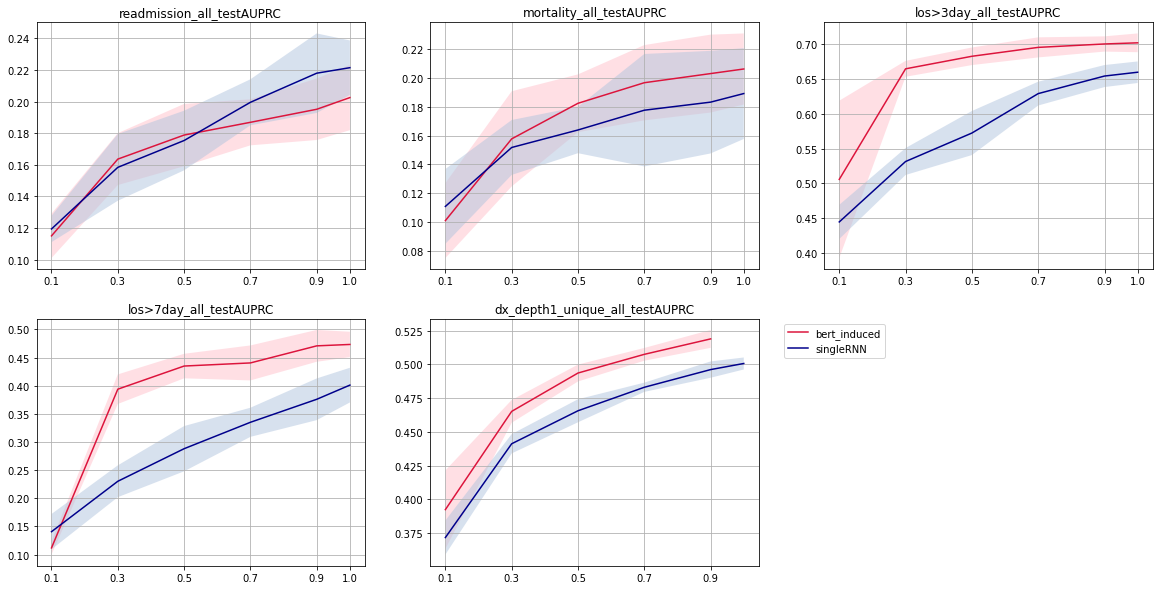

In [4]:
test = pd.read_csv('./wandb_export_2021-02-06T09_45_35.453+09_00.csv')
test = test[test['State']=='finished']

target_list = ['readmission', 'mortality', 'los>3day', 'los>7day', 'dx_depth1_unique']

fig = plt.figure(figsize=(20, 10))

for subplot, target in enumerate(target_list): 
    datasize_dep_plot(test, 'eicu', 'all', target, subplot_index=subplot+1)
    


In [14]:
def datasize_fewshot_plot(result_file:pd.DataFrame, test_file, item, target, subplot_index):
    
    result_file = result_file.loc[:,['bert_induced','bert_model','few_shot','item','seed','test_file','target','test_auprc']]

    # Ensure # of seeds is okay (i.e. not duplicated -- may be < 10!!!!)
    groupcheck = result_file.groupby(['test_file','target','item','few_shot','bert_induced','seed']).agg('count')
    assert not (any([any(groupcheck[i]>1) for i in groupcheck.columns])), 'Overlapping seeds'
    groupcheck = result_file.groupby(['test_file','target','item','few_shot','bert_induced']).agg('count')
    assert not (any([any(groupcheck[i]>10) for i in groupcheck.columns])), 'At least one cell would aggregate >10 seeds'

    result_file = result_file.drop('seed', axis=1)
    grouped = result_file.groupby(['test_file','target','item','few_shot','bert_induced']).agg(['mean','std'])
    sample = grouped.loc[(test_file, target, item)].reset_index(level=['few_shot','bert_induced'], col_level=1)

#     if test_file=='both':
#         sample = sample.drop('test_auprc', axis=1)
#     else:
#         sample = sample.drop(['eicu_test_auprc','mimic_test_auprc'],axis=1)

    # Messy, but the more elegant approach was giving me trouble
    BERT = sample.loc[sample.iloc[:,1]] # sample.iloc[:,1] is the "bert_induced" index...

    idx = pd.IndexSlice
    BERTfewshot_levels = BERT.loc[:,idx[:, 'few_shot']].values.flatten()
    BERTmeans = BERT.loc[:,('test_auprc','mean')].values
    BERTupper_sd = BERTmeans + BERT.loc[:,('test_auprc','std')].values
    BERTlower_sd = BERTmeans - BERT.loc[:,('test_auprc','std')].values

    RNN = sample.loc[~sample.iloc[:,1]] # i.e. keep if bert_induced == False
    RNNfewshot_levels = RNN.loc[:,idx[:, 'few_shot']].values.flatten()
    RNNmeans = RNN.loc[:,('test_auprc','mean')].values
    RNNupper_sd = RNNmeans + RNN.loc[:,('test_auprc','std')].values
    RNNlower_sd = RNNmeans - RNN.loc[:,('test_auprc','std')].values

    # Plot
    ax = fig.add_subplot(2, 3, subplot_index)
    
    # BERT induced
    ax.plot(BERTfewshot_levels, BERTmeans, color='crimson', label='bert_induced')
    plt.fill_between(BERTfewshot_levels, BERTupper_sd, BERTlower_sd, facecolor='pink', alpha=0.5)

    # singleRNN
    ax.plot(RNNfewshot_levels, RNNmeans, color='darkblue', label='singleRNN')
    plt.fill_between(RNNfewshot_levels, RNNupper_sd, RNNlower_sd, facecolor='lightsteelblue', alpha=0.5)

    ax.set_xticks(BERTfewshot_levels, minor=False)
    ax.grid(which='major', axis='x')
    ax.grid(which='major', axis='y')
    plt.title('{}_{}_{}'.format(target, item, 'testAUPRC'))

    if subplot_index == 5:
        plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))


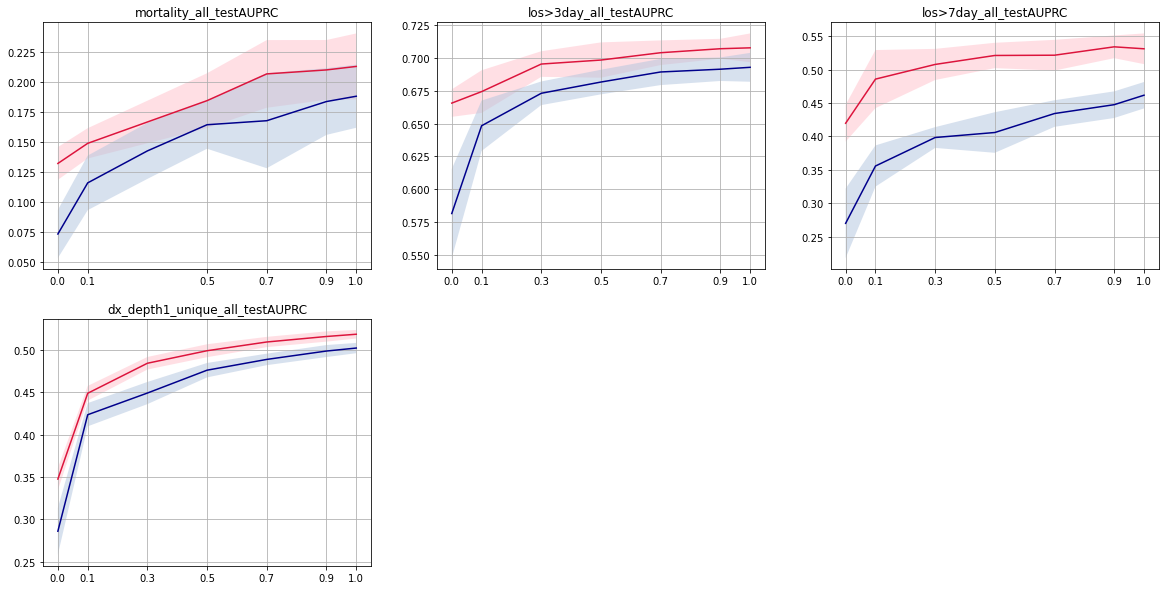

In [15]:
test = pd.read_csv('./wandb_export_2021-02-06T07_04_42.911+09_00.csv')
test = test[test['State']=='finished']

target_list = ['mortality', 'los>3day', 'los>7day', 'dx_depth1_unique']

fig = plt.figure(figsize=(20, 10))

for subplot, target in enumerate(target_list): 
    datasize_fewshot_plot(test, 'eicu', 'all', target, subplot_index=subplot+1)
    


In [8]:
result_file = test.loc[:,['bert_induced','bert_model','few_shot','item','seed','test_file','target','test_auprc']]
groupcheck = result_file.groupby(['test_file','target','item','few_shot','bert_induced','seed']).agg('count')

In [9]:
pd.set_option('display.max_row', 1300)
pd.set_option('display.max_columns', 100)

In [10]:
groupcheck

bert_model  \
test_file target           item few_shot bert_induced seed               
eicu      dx_depth1_unique all  0.0      False        2020           1   
                                                      2021           1   
                                                      2022           1   
                                                      2023           1   
                                                      2024           1   
                                                      2025           1   
                                                      2026           1   
                                                      2027           1   
                                                      2028           1   
                                                      2029           1   
                                         True         2020           1   
                                                      2021           1   
                                                      2022           1   
                                                      2023           1   
                                                      2024           1   
                                                      2025           1   
                                                      2026           1   
                                                      2027           1   
                                                      2028           1   
                                                      2029           1   
                                0.1      False        2020           1   
                                                      2021           1   
                                                      2022           1   
                                                      2023           1   
                                                      2024           1   
                                                      2025           1   
                                                      2026           1   
                                                      2027           1   
                                                      2028           1   
                                                      2029           1   
                                         True         2020           1   
                                                      2021           1   
                                                      2022           1   
                                                      2023           1   
                                                      2024           1   
                                                      2025           1   
                                                      2026           1   
                                                      2027           1   
                                                      2028           1   
                                                      2029           1   
                                0.3      False        2020           1   
                                                      2021           1   
                                                      2022           1   
                                         True         2020           1   
                                                      2021           1   
                                                      2022           1   
                                                      2023           1   
                                                      2024           1   
                                                      2025           1   
                                                      2026           1   
                                                      2027           1   
                                                      2028           1   
                                                      2029      